In [1]:
from google.colab import files
uploaded = files.upload()


Saving Superstore-Sales.csv to Superstore-Sales.csv


In [3]:
import pandas as pd
import sqlite3

# ✅ Load with proper encoding
df = pd.read_csv("Superstore-Sales.csv", encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [4]:
# ✅ Create DB and insert table
conn = sqlite3.connect("superstore.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

# ✅ Run a sample query
cursor = conn.cursor()
cursor.execute("SELECT Region, SUM(Sales) FROM sales GROUP BY Region")
for row in cursor.fetchall():
    print(row)


('Atlantic', 2014248.2034999996)
('Northwest Territories', 800847.3295000001)
('Nunavut', 116376.4835)
('Ontario', 3063212.4794999994)
('Prarie', 2837304.6014999985)
('Quebec', 1510195.0799999996)
('West', 3597549.2754999986)
('Yukon', 975867.370999999)


In [5]:
print("\n👤 Top 5 Customers by Sales:")
cursor.execute("""
SELECT [Customer Name], SUM(Sales) AS TotalSales
FROM sales
GROUP BY [Customer Name]
ORDER BY TotalSales DESC
LIMIT 5
""")
for row in cursor.fetchall():
    print(row)



👤 Top 5 Customers by Sales:
('Emily Phan', 117124.43800000001)
('Deborah Brumfield', 97433.13549999997)
('Roy Skaria', 92542.15299999999)
('Sylvia Foulston', 88875.75749999999)
('Grant Carroll', 88417.00249999997)


In [6]:
print("\n📈 Monthly Sales Trend:")
cursor.execute("""
SELECT
  SUBSTR([Order Date], 1, 7) AS Month,  -- YYYY-MM
  SUM(Sales) AS MonthlySales
FROM sales
GROUP BY Month
ORDER BY Month
""")
for row in cursor.fetchall():
    print(row)



📈 Monthly Sales Trend:
('1/1/200', 1052.8400000000001)
('1/1/201', 11042.77)
('1/10/20', 116418.57099999995)
('1/11/20', 88369.04999999997)
('1/12/20', 33933.84399999999)
('1/13/20', 46661.6935)
('1/14/20', 70010.9)
('1/15/20', 20258.517999999996)
('1/16/20', 17422.500500000002)
('1/17/20', 14198.669499999998)
('1/18/20', 48856.48500000001)
('1/19/20', 41363.282)
('1/2/200', 11101.869999999997)
('1/2/201', 38804.748)
('1/20/20', 38561.823500000006)
('1/21/20', 30272.492)
('1/22/20', 68385.95400000001)
('1/23/20', 12911.6005)
('1/24/20', 44495.51200000001)
('1/25/20', 38988.90800000001)
('1/26/20', 34108.728)
('1/27/20', 35651.7705)
('1/28/20', 24544.4695)
('1/29/20', 31314.819)
('1/3/200', 31997.855499999998)
('1/3/201', 55390.7665)
('1/30/20', 35516.00550000001)
('1/31/20', 39408.82000000001)
('1/4/200', 1254.25)
('1/4/201', 50353.2305)
('1/5/200', 39734.40400000001)
('1/5/201', 19818.892999999996)
('1/6/200', 35525.7985)
('1/6/201', 43017.44)
('1/7/200', 52140.9085)
('1/7/201', 1360

In [8]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost', 'Customer Name', 'Province', 'Region', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date']


In [11]:
print("\n💰 Profit by Product Category:")
cursor.execute("""
SELECT [Product Category], SUM(Profit) AS TotalProfit
FROM sales
GROUP BY [Product Category]
""")
for row in cursor.fetchall():
    print(row)



💰 Profit by Product Category:
('Furniture', 117433.03000000017)
('Office Supplies', 518021.4299999999)
('Technology', 886313.5199999989)


In [12]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime
df['Month'] = df['Order Date'].dt.to_period('M')     # Add Month column


In [14]:
print("📊 Summary Stats:")
print(df[['Sales', 'Profit', 'Order Quantity']].describe())


📊 Summary Stats:
              Sales        Profit  Order Quantity
count   8399.000000   8399.000000     8399.000000
mean    1775.878179    181.184424       25.571735
std     3585.050525   1196.653371       14.481071
min        2.240000 -14140.700000        1.000000
25%      143.195000    -83.315000       13.000000
50%      449.420000     -1.500000       26.000000
75%     1709.320000    162.750000       38.000000
max    89061.050000  27220.690000       50.000000


In [15]:
df[['Sales', 'Profit', 'Order Quantity']].corr()


,Sales,Profit,Order Quantity
Sales,1.000000,0.581960,0.220582
Profit,0.581960,1.000000,0.194655
Order Quantity,0.220582,0.194655,1.000000


In [16]:
# Total Sales by Region
print(df.groupby('Region')['Sales'].sum())

# Profit by Product Category
print(df.groupby('Product Category')['Profit'].sum())

# Monthly Sales Trend
print(df.groupby('Month')['Sales'].sum())


Region
Atlantic                 2.014248e+06
Northwest Territories    8.008473e+05
Nunavut                  1.163765e+05
Ontario                  3.063212e+06
Prarie                   2.837305e+06
Quebec                   1.510195e+06
West                     3.597549e+06
Yukon                    9.758674e+05
Name: Sales, dtype: float64
Product Category
Furniture          117433.03
Office Supplies    518021.43
Technology         886313.52
Name: Profit, dtype: float64
Month
2009-01    516302.9595
2009-02    332480.6365
2009-03    411628.7290
2009-04    393276.4820
2009-05    230145.5380
2009-06    263456.0680
2009-07    380503.9700
2009-08    329754.7150
2009-09    325292.3145
2009-10    361555.2665
2009-11    248933.4260
2009-12    415809.3505
2010-01    336526.6805
2010-02    271580.5080
2010-03    217808.0065
2010-04    266968.5890
2010-05    283534.2850
2010-06    293080.6650
2010-07    229885.4985
2010-08    207937.0090
2010-09    418343.2785
2010-10    365251.9850
2010-11    29067

/tmp/ipython-input-17-3282654043.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product Category', y='Sales', estimator=sum, ci=None)


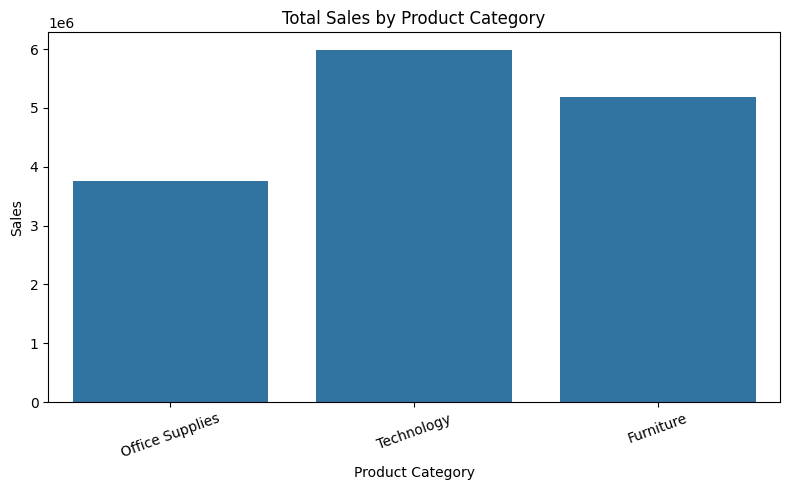

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Product Category', y='Sales', estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.ylabel("Sales")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


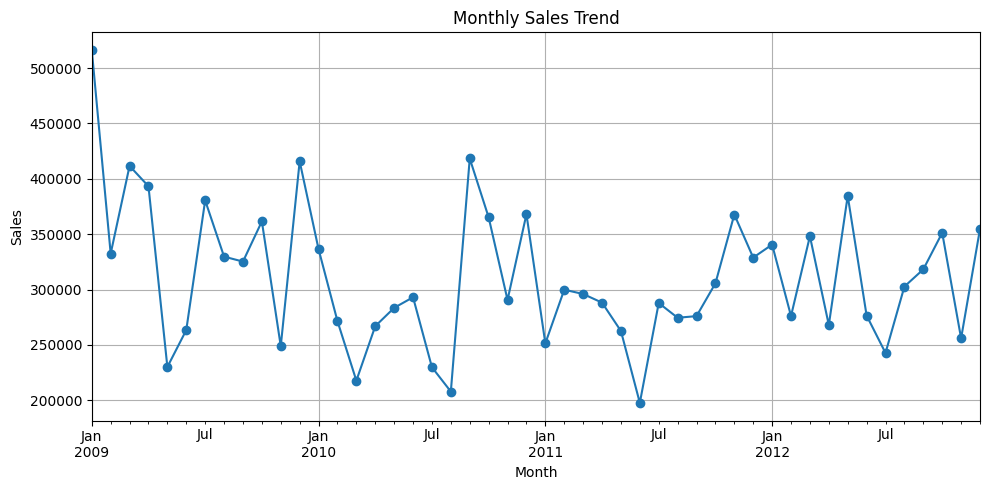

In [18]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


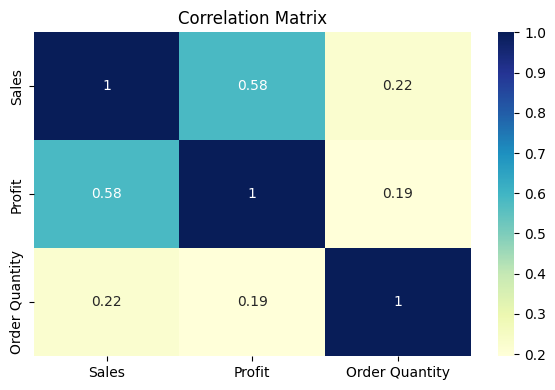

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Order Quantity']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [21]:
df.to_csv("cleaned_sales.csv", index=False)


In [22]:
from google.colab import files
files.download("cleaned_sales.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"📊 Total Sales: ${total_sales:,.2f}")
print(f"💰 Total Profit: ${total_profit:,.2f}")
print(f"🛒 Total Unique Orders: {total_orders}")


📊 Total Sales: $14,915,600.82
💰 Total Profit: $1,521,767.98
🛒 Total Unique Orders: 5496
